In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import os
os.chdir("/content/gdrive/My Drive/Final_Folder/")

In [3]:
from keras.callbacks import ReduceLROnPlateau
from keras.layers import (Input, Conv2D, BatchNormalization, ZeroPadding2D,
                          MaxPooling2D, Activation, Dense, Dropout, Flatten)
from keras.models import Model
from keras import optimizers
from base_model import BaseModel
from train import train

MODEL_NAME = 'VGG16' # This should be modified when the model name changes.

class VGG16(BaseModel):
    '''
    1. ZeroPadding2D (2, 2)
    2. (3X3 Conv2D 64) X 2 + maxpool
    3. (3X3 Conv2D 128) X 2 + maxpool
    4. (3X3 Conv2D 256) X 3 + maxpool
    5. (3X3 Conv2D 512) X 3 + maxpool
    6. (3X3 Conv2D 512) X 3 + maxpool
    7. (FC 256 + Dropout(0.5)) X 2
    8. FC 10 + Softmax

    '_build()' is only modified when the model changes.

    HowToUse:
        model = VGG16()
        * all funtionalities are written in BaseModel.py
    '''
    def __init__(self):
        callbacks = [ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1,
                                       patience = 10, verbose = 1)]
        optimizer = optimizers.SGD(lr=0.01, momentum=0.9, decay=1e-04)
        BaseModel.__init__(self, model = self._build(), optimizer = optimizer,
                           callbacks = callbacks)

    def _build(self):
        '''
        Builds VGG16. Details written in the paper below.
        - Very Deep Convolutional Networks for Large-Scale Image Recognition
          (https://arxiv.org/abs/1409.1556)

        Returns:
            VGG16 model
        '''
        x = Input(shape = (28, 28, 1))
        y = ZeroPadding2D(padding = (2, 2))(x) # matching the image size of CIFAR-10

        y = self._multi_conv_pool(y, 64, 2) # 32x32
        y = self._multi_conv_pool(y, 128, 2) # 16x16
        y = self._multi_conv_pool(y, 256, 3) # 8x8
        y = self._multi_conv_pool(y, 512, 3) # 4x4
        y = self._multi_conv_pool(y, 512, 3) # 2x2
        y = Flatten()(y)
        y = Dense(units = 256, activation='relu')(y) # original paper suggests 4096 FC
        y = Dropout(0.5)(y)
        y = Dense(units = 256, activation='relu')(y)
        y = Dropout(0.5)(y)
        y = Dense(units = 10)(y)
        y = Activation('softmax')(y)

        return Model(x, y, name = MODEL_NAME)

    def _multi_conv_pool(self, x, output_channel, n):
        '''
        Builds (Conv2D - BN - Relu) X n - MaxPooling2D
        The training is regularized by global weight decay (5e-4) in the original paper,
        but BN is used here instead of weight decay

        Returns:
            multi conv + max pooling block
        '''
        y = x
        for _ in range(n):
            y = Conv2D(output_channel, (3, 3), padding = 'same')(y)
            y = BatchNormalization()(y)
            y = Activation('relu')(y)
        y = MaxPooling2D(strides = (2, 2))(y)
        return y

# def main():
#     '''
#     Train the model defined above.
#     '''
#     model = VGG16()
    
#     train(model, MODEL_NAME)

# if __name__ == '__main__':
#     main()

Using TensorFlow backend.


In [4]:
model = VGG16()
model.load_weights("Weights/VGG16_MNIST.h5")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
import numpy as np

## Testing on Non-manipulated Images

In [0]:
list_images = np.load('./Test_Data/MNIST/Rotated/listOfImages.npy')

In [0]:
# from matplotlib import pyplot as plt
# plt.imshow(list_images[720])
# op = model.predict(list_images[720].reshape(1, 28, 28, 1))
# print(op)
# print("Prediction:",np.argmax(op))

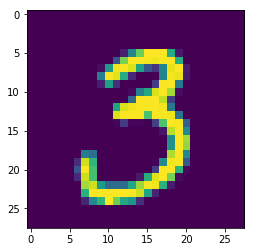

In [52]:
from matplotlib import pyplot as plt
plt.imshow(list_images[90])

In [8]:
op = model.predict(list_images[90].reshape(1, 28, 28, 1))
print(op)
print("Prediction:",np.argmax(op))

1/1 [==============================] - 0s 224ms/step
[[3.7330001e-09 1.4735416e-07 5.2271338e-07 9.9995220e-01 5.7514431e-11
  4.2014384e-05 7.7687590e-10 7.1262169e-09 5.0231597e-06 1.4788957e-07]]
Prediction: 3


## Testing on Rotated Images


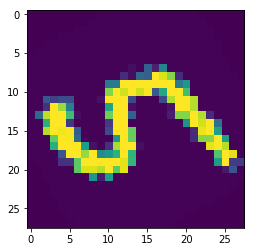

In [9]:
from matplotlib import pyplot as plt
plt.imshow(list_images[5451])

In [10]:
op = model.predict(list_images[5451].reshape(1, 28, 28, 1))
print(op)
print("Prediction:",np.argmax(op))

1/1 [==============================] - 0s 40ms/step
[[9.9605751e-01 4.1411183e-04 1.2584466e-04 2.9997146e-04 4.1131436e-05
  1.5311162e-03 5.1496399e-04 1.4843505e-04 1.2304912e-04 7.4385601e-04]]
Prediction: 0


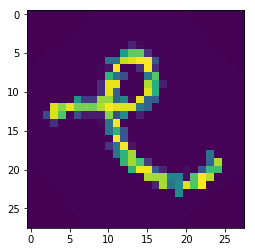

In [11]:
plt.imshow(list_images[47])

In [12]:
op = model.predict(list_images[47].reshape(1, 28, 28, 1))
print(op)
print("Prediction:",np.argmax(op))

1/1 [==============================] - 0s 46ms/step
[[2.2031738e-06 9.9907851e-01 1.2580524e-04 1.6369313e-05 6.3426181e-05
  7.4667018e-06 5.4362583e-05 5.7503494e-04 7.1434697e-05 5.3177037e-06]]
Prediction: 1


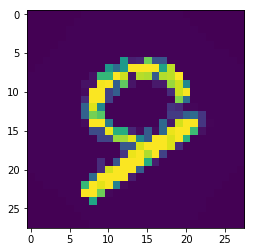

In [13]:
plt.imshow(list_images[16])

In [14]:
op = model.predict(list_images[16].reshape(1, 28, 28, 1))
print(op)
print("Prediction:",np.argmax(op))

1/1 [==============================] - 0s 46ms/step
[[0.03450707 0.36188513 0.02624499 0.02235434 0.06437825 0.0212488
  0.01169802 0.09768755 0.0431225  0.31687337]]
Prediction: 1


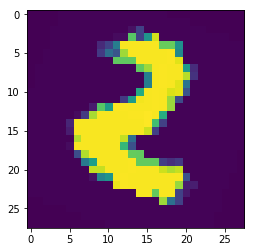

In [15]:
plt.imshow(list_images[8495])

In [16]:
op = model.predict(list_images[8495].reshape(1, 28, 28, 1))
print(op)
print("Prediction:",np.argmax(op))

1/1 [==============================] - 0s 48ms/step
[[2.11926017e-05 9.96205389e-01 7.76925765e-04 1.09656175e-04
  3.36432917e-04 4.05522915e-05 1.88202888e-04 1.93572207e-03
  3.43675405e-04 4.24376012e-05]]
Prediction: 1


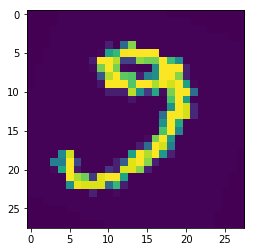

In [17]:
plt.imshow(list_images[98])

In [18]:
op = model.predict(list_images[98].reshape(1, 28, 28, 1))
print(op)
print("Prediction:",np.argmax(op))

1/1 [==============================] - 0s 48ms/step
[[4.3604305e-05 9.8597068e-01 6.3618383e-04 1.5402383e-04 4.3647512e-04
  8.6957756e-05 1.5845121e-04 1.1676141e-02 6.2076334e-04 2.1671988e-04]]
Prediction: 1


## Testing on Translated Images

In [0]:
list_images = np.load('./Test_Data/MNIST/Translated/test_4_transform.npy')

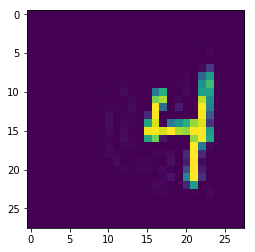

In [20]:
plt.imshow(list_images)

In [21]:
op = model.predict(list_images.reshape(1, 28, 28, 1))
print(op)
print("Prediction:",np.argmax(op))

1/1 [==============================] - 0s 38ms/step
[[2.4456037e-07 9.9973387e-01 2.3876693e-05 5.9024387e-06 8.6938635e-06
  1.0462981e-06 6.6288708e-06 2.0828930e-04 1.0763413e-05 6.9585298e-07]]
Prediction: 1


In [0]:
list_images = np.load('./Test_Data/MNIST/Translated/test_5_transform.npy')

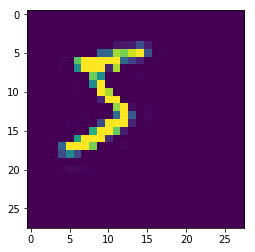

In [23]:
plt.imshow(list_images)

In [24]:
op = model.predict(list_images.reshape(1, 28, 28, 1))
print(op)
print("Prediction:",np.argmax(op))

1/1 [==============================] - 0s 45ms/step
[[2.5915730e-05 9.9370170e-01 5.3825922e-04 1.8293029e-04 3.1346033e-04
  1.1417666e-04 2.8405496e-04 4.1112024e-03 6.5915036e-04 6.9081063e-05]]
Prediction: 1


In [0]:
list_images = np.load('./Test_Data/MNIST/Translated/test_2_transform.npy')

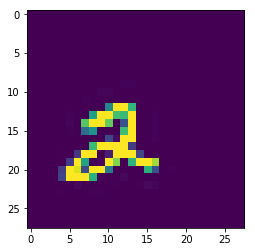

In [26]:
plt.imshow(list_images)

In [27]:
op = model.predict(list_images.reshape(1, 28, 28, 1))
print(op)
print("Prediction:",np.argmax(op))

1/1 [==============================] - 0s 48ms/step
[[6.2454809e-08 9.9989772e-01 9.0175236e-06 7.6728804e-07 3.7124423e-06
  2.2784837e-07 2.6086734e-06 8.2112572e-05 3.6343754e-06 1.8090918e-07]]
Prediction: 1


## Testing on Distorted Images

In [0]:
list_images = np.load('./Test_Data/MNIST/Distorted/test_6_deform.npy')

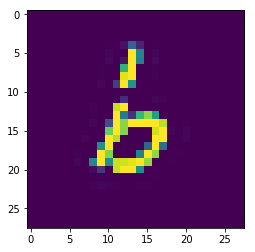

In [29]:
plt.imshow(list_images)

In [30]:
op = model.predict(list_images.reshape(1, 28, 28, 1))
print(op)
print("Prediction:",np.argmax(op))

1/1 [==============================] - 0s 42ms/step
[[2.3365843e-05 9.9668747e-01 7.8028039e-04 8.8419831e-05 3.1496005e-04
  8.2171879e-05 6.5124396e-04 1.0835853e-03 2.6514151e-04 2.3292912e-05]]
Prediction: 1


In [0]:
list_images = np.load('./Test_Data/MNIST/Distorted/test_0_deform1.npy')

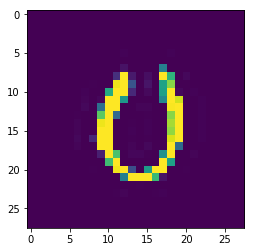

In [32]:
plt.imshow(list_images)

In [33]:
op = model.predict(list_images.reshape(1, 28, 28, 1))
print(op)
print("Prediction:",np.argmax(op))

1/1 [==============================] - 0s 42ms/step
[[2.4104020e-02 9.6303350e-01 1.8464453e-03 4.8434635e-04 1.1440843e-03
  2.1242909e-04 1.2298541e-03 5.4935557e-03 1.1595923e-03 1.2921934e-03]]
Prediction: 1


In [0]:
list_images = np.load('./Test_Data/MNIST/Distorted/test_7_deform.npy')

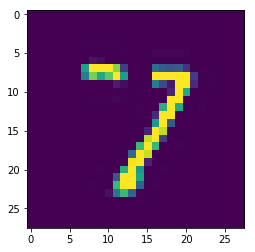

In [35]:
plt.imshow(list_images)

In [36]:
op = model.predict(list_images.reshape(1, 28, 28, 1))
print(op)
print("Prediction:",np.argmax(op))

1/1 [==============================] - 0s 42ms/step
[[4.31382752e-08 9.73557115e-01 2.29964644e-06 2.12189704e-07
  1.73869728e-06 1.02198555e-07 1.60101692e-07 2.64344383e-02
  2.47033881e-06 1.39732629e-06]]
Prediction: 1
